In [ ]:
                                    SPAM MAIL DETECTION USING Deep Learning IN PYTHON

Step 1:Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("spam.csv",encoding='utf-8',encoding_errors='ignore')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.columns=['label','text']

In [7]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df['label']=df['label'].map({"ham":0,"spam":1})

In [9]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


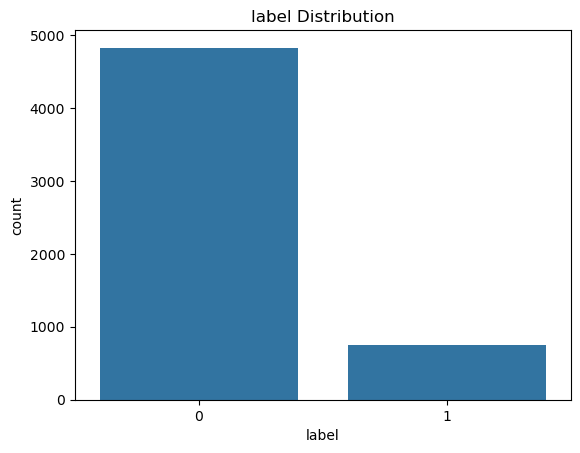

In [10]:
sns.countplot(x='label',data=df)
plt.title("label Distribution")
plt.show()

Step 2: Text Preprocessing

In [11]:
import nltk
import re
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [12]:
 nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stemmer=PorterStemmer()

In [14]:
def clean_text(text):
    #convert into lowercase
    text=text.lower()
    #remove URLs
    text=re.sub(r'https?://\S+|www\.\S+','',text)
    #remove HTML Tags
    text=re.sub(r'<.*?>','',text)
    #remove punctution
    text=re.sub(r'[^\w\s]','',text)
    #remove digits
    text=re.sub(r'\d','',text)
    #remove newline characters
    text=re.sub(r'\n','',text)
    return text

In [15]:
df['clean_text']=df['text'].apply(clean_text)

In [16]:
df

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5568,0,Will _ b going to esplanade fr home?,will _ b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


Step 3: Train-Test Split & Text Vectorization

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
X=df['clean_text']
y=df['label']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [21]:
# Convert text to sequences
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)


In [22]:
max_len=100
X_train_pad=pad_sequences(X_train_seq,maxlen=max_len,padding='post')
X_test_pad=pad_sequences(X_test_seq,maxlen=max_len,padding='post')

In [23]:
X_test_pad

array([[1237, 1440, 1495, ...,    0,    0,    0],
       [   2,  185,   11, ...,    0,    0,    0],
       [  37,   53,  238, ...,    0,    0,    0],
       ...,
       [ 135,    2,   17, ...,    0,    0,    0],
       [  30,    5, 1241, ...,    0,    0,    0],
       [   3,   17,   98, ...,    0,    0,    0]])

In [24]:
X_train_pad

array([[  38,   22,    8, ...,    0,    0,    0],
       [ 738,   14, 2297, ...,    0,    0,    0],
       [ 106,   85, 1312, ...,    0,    0,    0],
       ...,
       [1872, 1873,  246, ...,    0,    0,    0],
       [ 757, 1545, 1044, ...,    0,    0,    0],
       [   8,  143,   21, ...,    0,    0,    0]])

Step 4: Build ANN Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [26]:
ann_model=Sequential([
    Dense(256,activation='relu',input_shape=(max_len,),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128,activation='relu',kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')  
])


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
ann_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,609 (268.00 KB)

 Trainable params: 67,841 (265.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [29]:
history = ann_model.fit(X_train_pad,y_train,epochs=10,batch_size=32,validation_data=(X_test_pad,y_test))


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7513 - loss: 3.0547 - val_accuracy: 0.8700 - val_loss: 1.8141
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8448 - loss: 1.7406 - val_accuracy: 0.8556 - val_loss: 1.3033
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8640 - loss: 1.2446 - val_accuracy: 0.8691 - val_loss: 0.9754
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8691 - loss: 0.9620 - val_accuracy: 0.8628 - val_loss: 0.7826
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8712 - loss: 0.7622 - val_accuracy: 0.8834 - val_loss: 0.6464
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8669 - loss: 0.6594 - val_accuracy: 0.8753 - val_loss: 0.5731
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8785 - loss: 0.5537 - val_accuracy: 0.8744 - val_loss: 0.5185
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8754 - loss: 0.5210 - val_accuracy: 

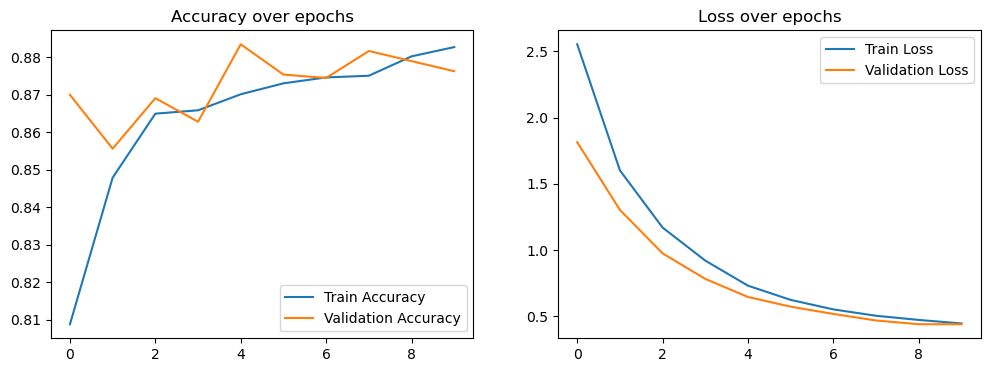

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

In [31]:
loss, accuracy=ann_model.evaluate(X_test_pad,y_test)
print(f"Test Accuracy: {accuracy:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8843 - loss: 0.4288
Test Accuracy: 0.8762


CNN Model Architecture

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Conv1D,GlobalMaxPooling1D,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
vocab_size=5000
embedding_dim=100
max_len=100

In [34]:
cnn_model=Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    Conv1D(filters=128,kernel_size=5,activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [36]:
cnn_model.build(input_shape=(None,max_len))
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572,449 (2.18 MB)

 Trainable params: 572,449 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
cnn_model.fit(X_train_pad,y_train,epochs=10,batch_size=32,validation_data=(X_test_pad,y_test))


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8445 - loss: 0.4367 - val_accuracy: 0.9812 - val_loss: 0.0743
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9838 - loss: 0.0615 - val_accuracy: 0.9803 - val_loss: 0.0542
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9969 - loss: 0.0193 - val_accuracy: 0.9812 - val_loss: 0.0601
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9995 - loss: 0.0065 - val_accuracy: 0.9821 - val_loss: 0.0645
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9857 - val_loss: 0.0688
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9848 - val_loss: 0.0803
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 0.9874 - val_loss: 0.0831
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 1.0000 - loss: 8.6764e-04 - val

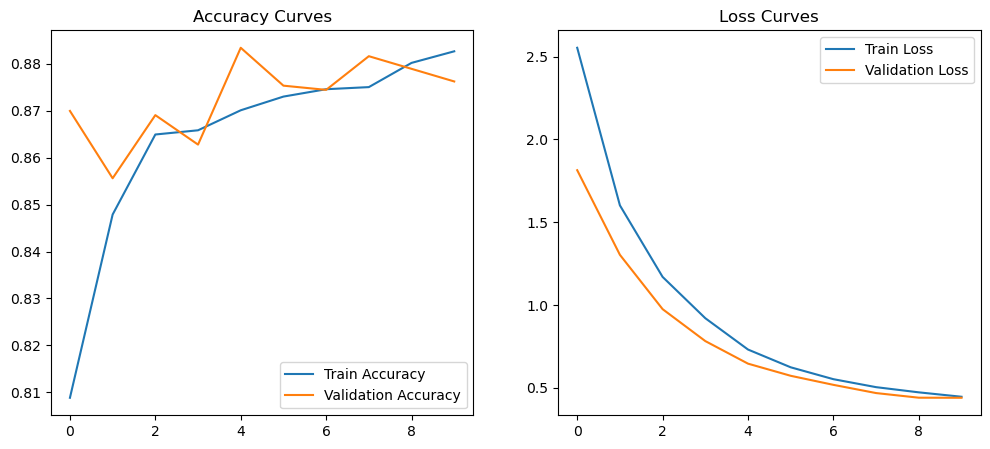

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [39]:
test_loss,test_acc=ann_model.evaluate(X_test_pad,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8843 - loss: 0.4288

Test Accuracy: 0.8762
Test Loss: 0.4404


Overfitting CNN Model Architecture

In [40]:
from tensorflow.keras import regularizers
cnn_model_imp = Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    Conv1D(filters=128,kernel_size=5,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [42]:
cnn_model_imp.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

In [43]:
cnn_model_imp.build(input_shape=(None,max_len))
cnn_model_imp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572,449 (2.18 MB)

 Trainable params: 572,449 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cnn_model_imp.fit(X_train_pad,y_train,epochs=10,batch_size=32, 
                  validation_data=(X_test_pad,y_test), 
                  callbacks=[early_stopping])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8638 - loss: 1.4657 - val_accuracy: 0.8897 - val_loss: 0.3932
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9472 - loss: 0.2958 - val_accuracy: 0.9767 - val_loss: 0.1713
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9858 - loss: 0.1424 - val_accuracy: 0.9821 - val_loss: 0.1389
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9907 - loss: 0.1144 - val_accuracy: 0.9839 - val_loss: 0.1163
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9939 - loss: 0.0894 - val_accuracy: 0.9830 - val_loss: 0.1096
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9962 - loss: 0.0764 - val_accuracy: 0.9821 - val_loss: 0.1067
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9968 - loss: 0.0692 - val_accuracy: 0.9857 - val_loss: 0.1012
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9964 - loss: 0.0646 - val_acc

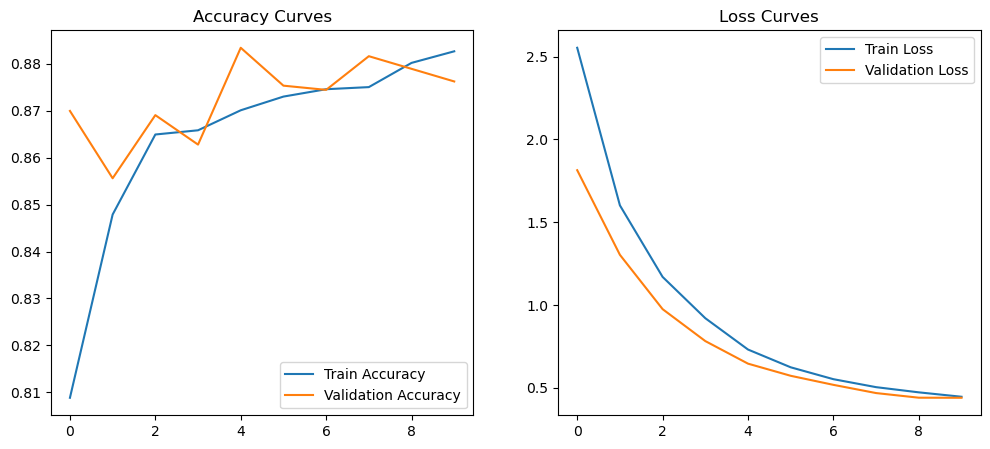

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [46]:
test_loss,test_acc=cnn_model_imp.evaluate(X_test_pad,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9891 - loss: 0.0707

Test Accuracy: 0.9830
Test Loss: 0.0885


LSTM Model Architecture

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [48]:
vocab_size=5000
embedding_dim=100
max_len=100

In [49]:
lstm_model=Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    LSTM(128,return_sequences=True),  
    GlobalMaxPooling1D(),  
    Dense(64,activation='relu'),
    Dropout(0.5),  
    Dense(1,activation='sigmoid')  
])

In [50]:
lstm_model.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

In [51]:
lstm_model.fit(X_train_pad,y_train,epochs=10,batch_size=32, 
               validation_data=(X_test_pad,y_test), 
               callbacks=[early_stopping])

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.8708 - loss: 0.4084 - val_accuracy: 0.9578 - val_loss: 0.1387
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9773 - loss: 0.0876 - val_accuracy: 0.9812 - val_loss: 0.0948
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9915 - loss: 0.0412 - val_accuracy: 0.9839 - val_loss: 0.0921
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.9966 - loss: 0.0127 - val_accuracy: 0.9830 - val_loss: 0.0804
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.9975 - loss: 0.0148 - val_accuracy: 0.9839 - val_loss: 0.0677
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.9803 - val_loss: 0.1424
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.9971 - loss: 0.0131 - val_accuracy: 0.9803 - val_loss: 0.1394
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.9952 - loss: 0

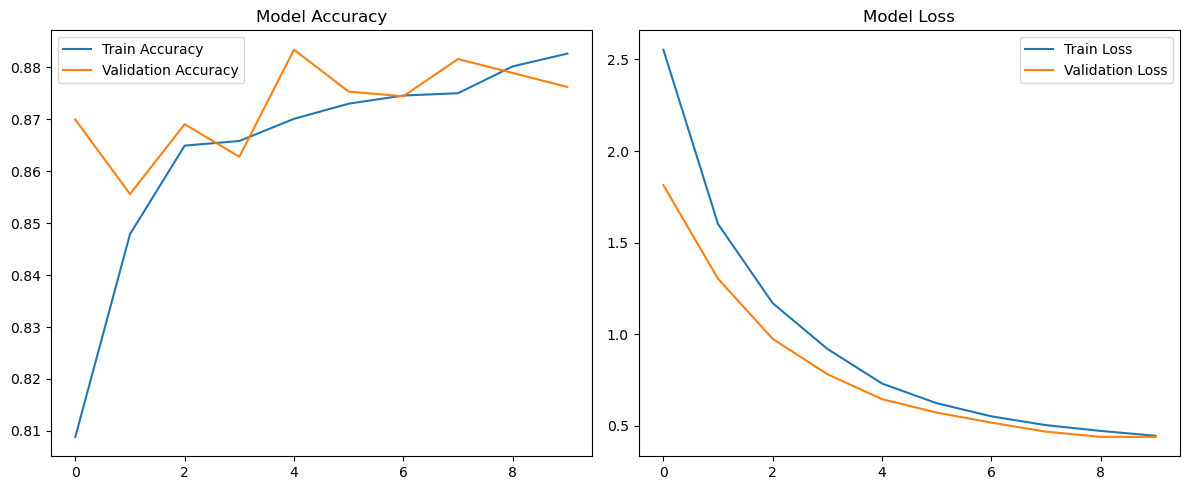

In [52]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
lstm_test_loss,lstm_test_acc=lstm_model.evaluate(X_test_pad,y_test)
print(f"\nLSTM Test Accuracy: {lstm_test_acc:.4f}")
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9896 - loss: 0.0401

LSTM Test Accuracy: 0.9839
LSTM Test Loss: 0.0677


Overfitting LSTM Model Architecture

In [55]:
lstm_model_imp= Sequential([
    Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=max_len),
    LSTM(128,return_sequences=True,kernel_regularizer=regularizers.l2(0.01)),  
    GlobalMaxPooling1D(),
    Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [56]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)


In [57]:
lstm_model_imp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [58]:
lstm_model_imp.build(input_shape=(None,max_len))
lstm_model_imp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_3               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625,569 (2.39 MB)

 Trainable params: 625,569 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history=lstm_model_imp.fit(
    X_train_pad,y_train,
    validation_data=(X_test_pad,y_test),
    epochs=30,  
    batch_size=32,  
    callbacks=early_stopping,
    verbose=1
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.8419 - loss: 1.7687 - val_accuracy: 0.8655 - val_loss: 0.3573
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.9270 - loss: 0.2844 - val_accuracy: 0.9363 - val_loss: 0.2173
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.9731 - loss: 0.1698 - val_accuracy: 0.9668 - val_loss: 0.1689
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - accuracy: 0.9385 - loss: 0.1974 - val_accuracy: 0.8655 - val_loss: 0.2519
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.9353 - loss: 0.1814 - val_accuracy: 0.9695 - val_loss: 0.2243
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.9789 - loss: 0.1687 - val_accuracy: 0.9686 - val_loss: 0.1867


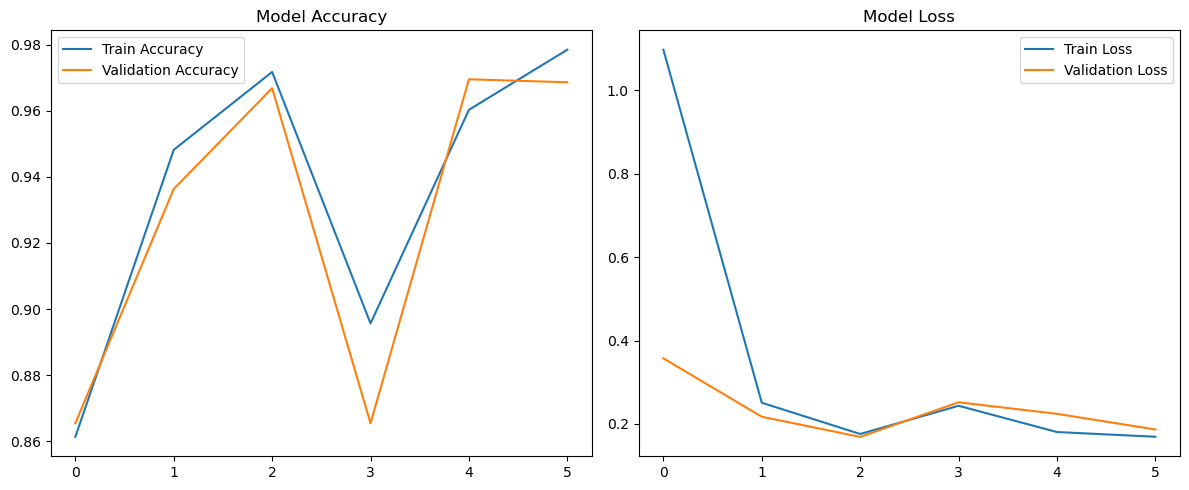

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
lstm_test_loss,lstm_test_acc=lstm_model.evaluate(X_test_pad,y_test)
print(f"\nLSTM Test Accuracy: {lstm_test_acc:.4f}")
print(f"LSTM Test Loss: {lstm_test_loss:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9896 - loss: 0.0401

LSTM Test Accuracy: 0.9839
LSTM Test Loss: 0.0677


In [64]:
lstm_model.save("lstm_model.keras")